In [ ]:
# we will start by importing required libraries requests for geting html respone from web and BeautifulSoup for parsing it
from bs4 import BeautifulSoup
import requests 

def no_data(offset):
    res=requests.get(f"https://www.boxofficemojo.com/chart/top_lifetime_gross/?area=XWW&offset={offset}").text
    soup=BeautifulSoup(res,'html.parser')
    res=soup.find("p",class_="mojo-gutter-sides")
    return True if res==None else False
rows=[]
offset=0
while True:
    if no_data(offset):
        url = f"https://www.boxofficemojo.com/chart/top_lifetime_gross/?area=XWW&offset={offset}"
        response = requests.get(url).text  # we just got and html response came from web, next we need to give this repone to BeautifulSoup as an argument for doing some operation
        soup = BeautifulSoup(response,'html.parser') # stored in variable soup
        table=soup.find("table").find_all("tr")
        for each_row in table:
            row=each_row.find_all("td")
            # print(row)
            row_data = []
            for r in row:
                row_data.append(r.text)
            rows.append(row_data)
    else:
        break
    offset+=200

In [3]:
while True:
    try:
        rows.remove([])
    except:
        break

In [ ]:
import pandas as pd
df=pd.DataFrame(rows)
df.rename(columns={0: "Rank",1:"Title",2:"Lifetime Gross",3:"Year"},inplace=True)
df.index = df['Rank']
df.drop(columns=['Rank'],inplace=True)

In [ ]:
df.to_csv("Movie_Gross_Web_Scraping.csv")

In [6]:
df['Lifetime Gross'] = [int(x.replace("$","").replace(",","")) for x in df['Lifetime Gross']]

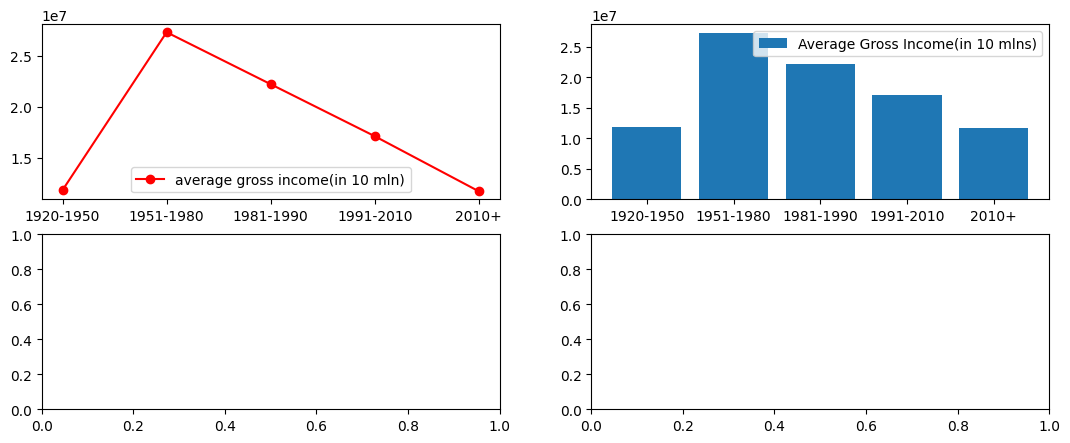

In [44]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sys

def classify(year):
    if int(year)<=1950:
        return "1920-1950"
    elif int(year)<=1980:
        return "1951-1980"
    elif int(year)<=1990:
        return "1981-1990"
    elif int(year)<=2010:
        return "1991-2010"
    else:
        return "2010+"

df["Year_Group"] = [classify(x) for x in df['Year']]
average_lifetime_gross_income = df.groupby("Year_Group").agg(
    Average_Gross_income = pd.NamedAgg('Lifetime Gross',aggfunc='mean')
)
fig,ax = plt.subplots(2,2,figsize = (13,5))
average_lifetime_gross_income=average_lifetime_gross_income.round(2)
ax[0,0].plot(average_lifetime_gross_income,marker="o",label="average gross income(in 10 mln)",color="red")
ax[0,0].legend()
ax[0,1].bar(average_lifetime_gross_income.index,average_lifetime_gross_income['Average_Gross_income'],label="Average Gross Income(in 10 mlns)")
ax[0,1].legend()

,Title,Lifetime Gross,Year,Year_Group
Rank,,,,
1,Avatar,2923710708,2009,1991-2010
2,Avengers: Endgame,2799439100,2019,2010+
3,Avatar: The Way of Water,2320250281,2022,2010+
4,Titanic,2264812968,1997,1991-2010
5,Star Wars: Episode VII - The Force Awakens,2071310218,2015,2010+
...,...,...,...,...
"58,629",La tara,8,2024,2010+
"58,630",The Uninvited,6,2024,2010+
"58,631",Guy Manley: Super Spy,4,2024,2010+
